In [ ]:
from google.colab import files
#Upload Kaggle API Key
files.upload()

In [2]:
!mkdir ~/.kaggle #make new directory in root folder
!cp kaggle.json ~/.kaggle/ #copy and paste kaggle API key to new directory
!chmod 600 ~/.kaggle/kaggle.json #permission
!kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           6974        215  1.0              
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1734         74  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03          12745        321  1.0              
panta

In [3]:
!kaggle datasets download -d mahirkukreja/delhi-weather-data

delhi-weather-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import os
import pandas as pd
import zipfile

In [5]:
zipPath = '../content/delhi-weather-data.zip'
zipFile = zipfile.ZipFile(zipPath, 'r')
zipFile.extractall('../content/delhiWeatherDataset') 
zipFile.close() 

In [6]:
df = pd.read_csv('../content/delhiWeatherDataset/testset.csv')
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [7]:
df.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [8]:
df_1 = df[["datetime_utc"," _tempm"]]

In [9]:
df_1.columns =["date", 'temp']


In [10]:
df_1.isnull().sum()

date      0
temp    673
dtype: int64

In [11]:
df_1.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
df_1["date"] = pd.to_datetime(df_1["date"])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100317 entries, 0 to 100989
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    100317 non-null  datetime64[ns]
 1   temp    100317 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_1 = df_1.set_index('date')

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_1 = scaler.fit_transform(df_1)

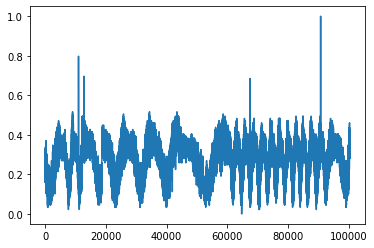

In [15]:
import matplotlib.pyplot as plt
plt.plot(data_1)

In [16]:
train_size = int(len(data_1)*0.8)
test_size = len(data_1) - train_size
X_data, y_data = data_1[0: train_size, :], data_1[train_size: len(data_1), :1]
train_size, test_size

(80253, 20064)

In [17]:
import tensorflow as tf
import numpy as np
def dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [18]:
X_train, y_train = dataset(X_data, 100)
X_test, y_test = dataset(y_data, 100)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout

In [20]:
model = Sequential([
    LSTM(64, return_sequences = True, input_shape=(100, 1)),
    Dropout(0.1),
    LSTM(64, return_sequences = True),
    Dropout(0.1),
    Bidirectional(LSTM(64)),
    Dropout(0.1),
    Dense(8, activation = 'relu'),
    Dense(1)
])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
auto_stop_learn = EarlyStopping(
    monitor = 'loss',
    min_delta = 0,
    patience = 2,
    verbose = 1,
    mode = 'auto' 
)

In [22]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"]
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 5,
    batch_size = 128, 
    callbacks = auto_stop_learn,
    verbose = 1
)


Epoch 1/5
627/627 [==============================] - 282s 438ms/step - loss: 0.0216 - mae: 0.1804 - val_loss: 0.0069 - val_mae: 0.1014
Epoch 2/5
627/627 [==============================] - 274s 436ms/step - loss: 0.0055 - mae: 0.0895 - val_loss: 0.0047 - val_mae: 0.0815
Epoch 3/5
627/627 [==============================] - 276s 439ms/step - loss: 0.0049 - mae: 0.0828 - val_loss: 0.0046 - val_mae: 0.0800
Epoch 4/5
627/627 [==============================] - 274s 437ms/step - loss: 0.0049 - mae: 0.0820 - val_loss: 0.0046 - val_mae: 0.0797
Epoch 5/5
627/627 [==============================] - 275s 439ms/step - loss: 0.0048 - mae: 0.0817 - val_loss: 0.0046 - val_mae: 0.0794


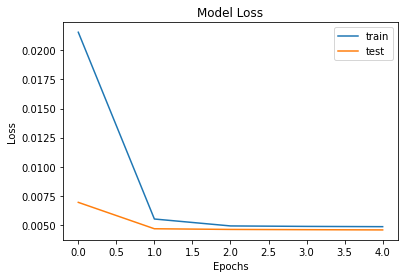

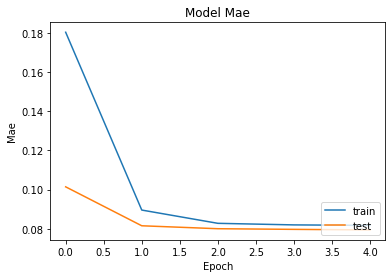

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()